## Descriptive Statistics
- We began by calcualting descriptive statistics of the Saudi Arabia's CPI data for all columns containing the CPI.

In [17]:
import pandas as pd
from tabulate import tabulate

# Load the data
df = pd.read_excel('KSA_CPI_INDICES.xlsx')

# Drop the 'Year' and 'Month' columns, leaving CPI columns
df = df.drop(['Year', 'Month'], axis=1)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GENERAL INDEX,115.0,101.960927,4.881805,95.871389,97.945014,99.788221,105.695000,111.360000
FOOD AND BEVERAGES,115.0,107.754822,11.810126,92.850423,95.907808,103.260000,119.175000,124.690000
TOBACCO,115.0,95.859060,22.112245,54.692708,77.838542,101.130124,114.760000,115.620000
CLOTHING AND FOOTWEAR,115.0,103.286617,4.797371,95.990000,98.995000,102.670000,108.919355,111.870968
"HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS",115.0,95.983081,5.363742,87.840000,90.880000,96.899717,101.334029,106.450000
"FURNISHINGS, HOUSEHOLD EQUIPMENT",115.0,103.101127,4.198417,94.985394,99.914371,100.370010,107.835000,110.320000
HEALTH,115.0,99.995813,3.304703,93.689937,96.473255,100.260000,102.920000,104.010000
TRANSPORT,115.0,102.926127,11.674722,85.373009,92.259011,100.132544,115.280000,119.700000
COMMUNICATION,115.0,104.000732,5.651793,97.890000,99.025000,100.104547,110.625000,112.430000
RECREATION AND CULTURE,115.0,102.410432,3.350632,95.367115,99.729709,102.320000,105.054633,109.080000


## Correlation Analysis

- Next, we calculate the correlation matrix of the data, which shows the relationships between different columns containing CPI data. 

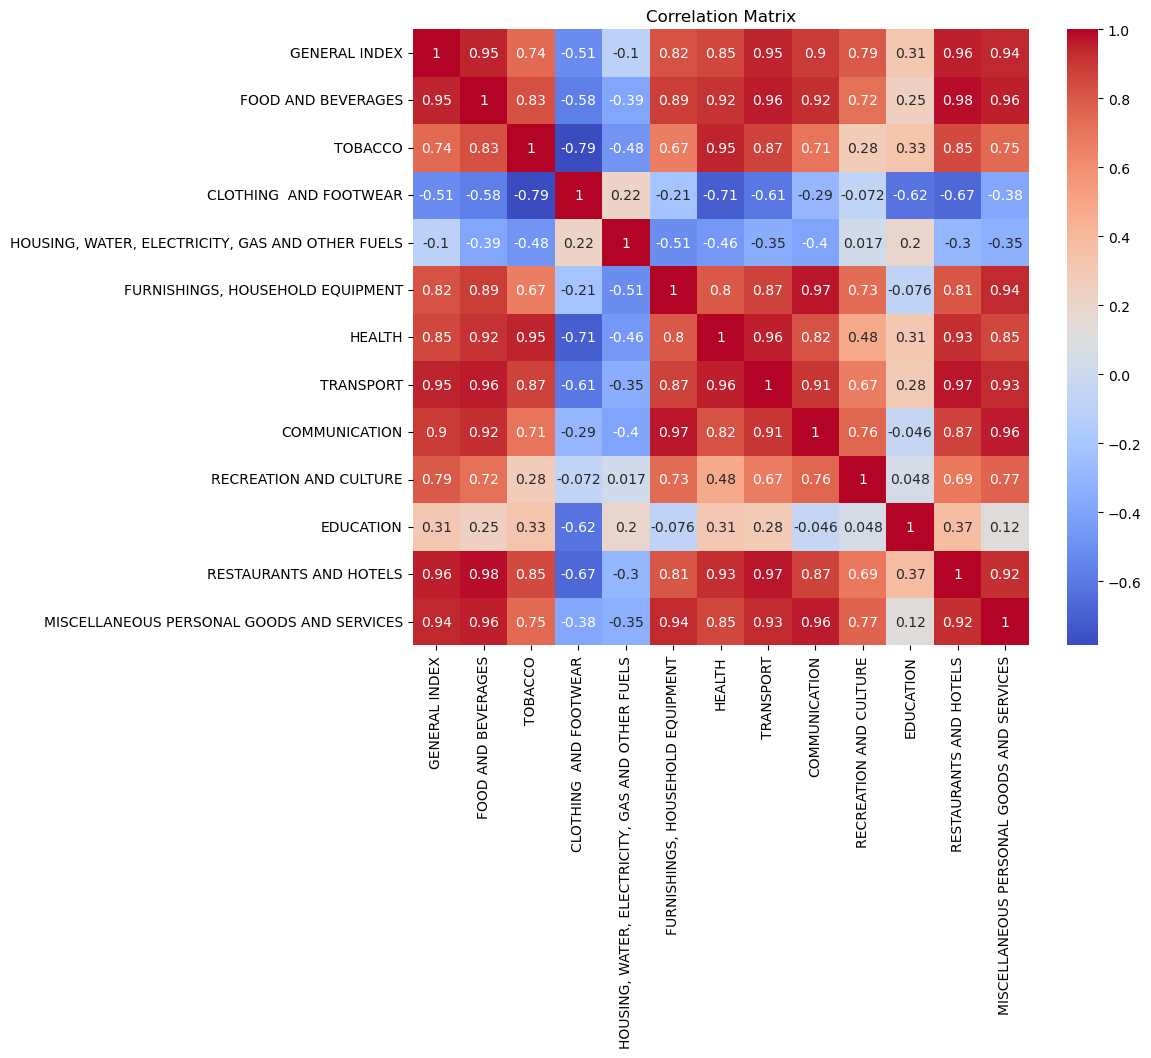

|                                                  |   GENERAL INDEX |   FOOD AND BEVERAGES |   TOBACCO |   CLOTHING  AND FOOTWEAR |   HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS |   FURNISHINGS, HOUSEHOLD EQUIPMENT |    HEALTH |   TRANSPORT |   COMMUNICATION |   RECREATION AND CULTURE |   EDUCATION |   RESTAURANTS AND HOTELS |   MISCELLANEOUS PERSONAL GOODS AND SERVICES |
|--------------------------------------------------+-----------------+----------------------+-----------+--------------------------+----------------------------------------------------+------------------------------------+-----------+-------------+-----------------+--------------------------+-------------+--------------------------+---------------------------------------------|
| GENERAL INDEX                                    |        1        |             0.947454 |  0.743968 |               -0.51406   |                                         -0.101603  |                          0.821756  |  0.854631 |    

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate


# Load the data
df = pd.read_excel('KSA_CPI_INDICES.xlsx')

# Drop the 'Year' and 'Month' columns, leaving CPI columns
df = df.drop(['Year', 'Month'], axis=1)

# Calculate correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Print correlation matrix in tabulated form
print(tabulate(corr_matrix, headers='keys', tablefmt='orgtbl'))

## Random Forest Classifier

Implementation below performs regression analysis on the Saudi Arabia CPI dataset to predict the target variable **'GENERAL INDEX'** using various predictor variables. The process involves:

- **Data Preparation**: The data is loaded from an Excel file, and the target variable along with predictor variables is defined. The data is then split into training and testing sets.

- **Model Selection and Tuning**: A RandomForestRegressor model is used, and GridSearchCV is employed to find the best hyperparameters for the model. This involves testing different combinations of hyperparameters and selecting the one that minimizes the mean squared error.

- **Model Evaluation**: The best model is then used to predict the target variable on the testing set. Various evaluation metrics, such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-Squared, are calculated to assess the model's performance.

- **Feature Importance Analysis**: The importance of each predictor variable is calculated and visualized using a bar chart. This helps in understanding which features contribute the most to the model's predictions.

MSE: 0.12473671188662862
MAE: 0.25068371941801887
RMSE: 0.3531808486974182
R-Squared: 0.995378993286539


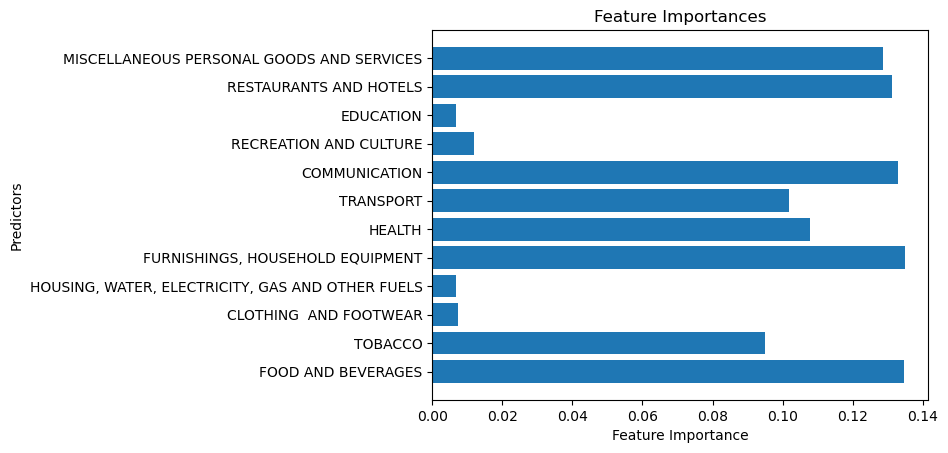

Feature Importances:
FOOD AND BEVERAGES: 0.1347
TOBACCO: 0.0949
CLOTHING  AND FOOTWEAR: 0.0074
HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS: 0.0069
FURNISHINGS, HOUSEHOLD EQUIPMENT: 0.1348
HEALTH: 0.1079
TRANSPORT: 0.1019
COMMUNICATION: 0.1329
RECREATION AND CULTURE: 0.0121
EDUCATION: 0.0069
RESTAURANTS AND HOTELS: 0.1311
MISCELLANEOUS PERSONAL GOODS AND SERVICES: 0.1286


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('KSA_CPI_INDICES.xlsx')

# Define the target variable and predictors
target = 'GENERAL INDEX'
predictors = df.columns.drop(['Month', 'Year', target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[target], test_size=0.2, random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R-Squared:', r_squared)

# Get the feature importances
feature_importances = best_model.feature_importances_

# Plot the feature importances as a horizontal bar chart
plt.barh(predictors, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Predictors')
plt.title('Feature Importances')
plt.show()

# Print the feature importances in tabulated form
print('Feature Importances:')
for predictor, importance in zip(predictors, feature_importances):
    print(f'{predictor}: {importance:.4f}')

## Linear Regression

Implementation below performs linear regression analysis on the Saudi Arabia CPI dataset to predict the target variable **'GENERAL INDEX'** using several predictor variables. The process involves:

- **Data Preparation**: The data is loaded, and the target and predictor variables are defined. The data is split into training and testing sets.

- **Data Standardization**: The predictor variables are standardized using StandardScaler to ensure that they have a mean of 0 and a standard deviation of 1. This helps improve the performance and interpretability of the linear regression model.

- **Model Training**: A linear regression model is fitted to the standardized training data using statsmodels, which also provides statistical details such as coefficients and p-values for each predictor. These are tabulated and printed to help interpret the significance of each predictor in the model.

- **Model Evaluation**: The model is used to make predictions on the testing data, and evaluation metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-Squared are calculated to assess the model's performance.

- **Feature Importance Analysis**: The importance (coefficients) of each predictor variable is visualized using a bar chart, providing insights into which predictors most influence the target variable.


| Coefficient                                      |    Value |   P-value |
|--------------------------------------------------+----------+-----------|
| Intercept                                        | 101.807  |    0      |
| FOOD AND BEVERAGES                               |   2.0398 |    0      |
| TOBACCO                                          |   0.1638 |    0      |
| CLOTHING  AND FOOTWEAR                           |   0.2038 |    0      |
| HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS |   1.4539 |    0      |
| FURNISHINGS, HOUSEHOLD EQUIPMENT                 |   0.2491 |    0      |
| HEALTH                                           |   0.0123 |    0.7359 |
| TRANSPORT                                        |   1.2791 |    0      |
| COMMUNICATION                                    |   0.348  |    0      |
| RECREATION AND CULTURE                           |   0.1492 |    0      |
| EDUCATION                                        |   0.0795 |    0      |
| RESTAURANT

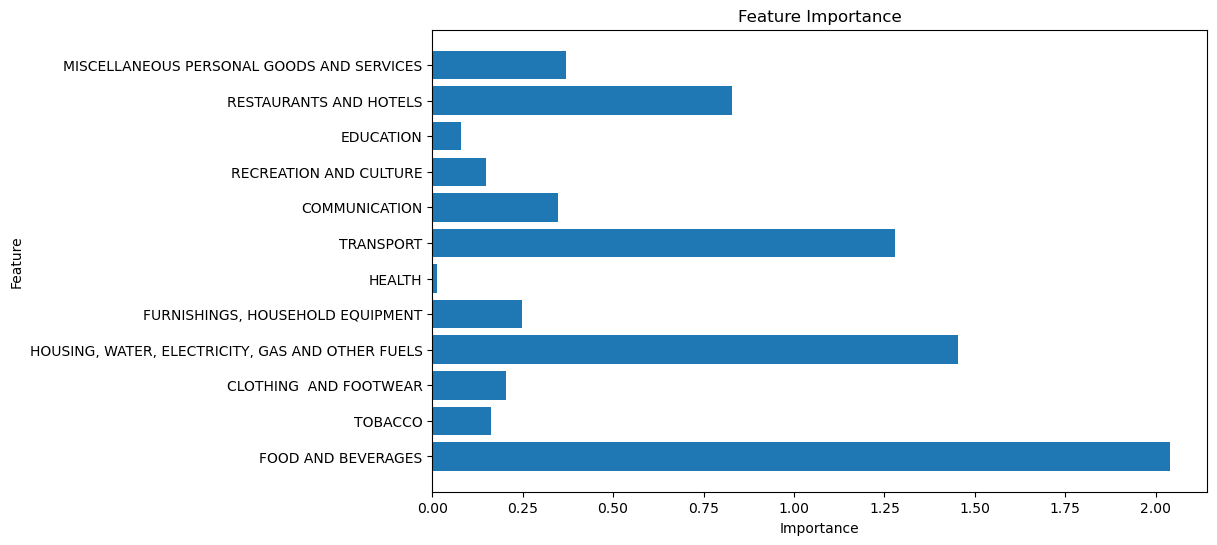

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_excel('KSA_CPI_INDICES.xlsx')

# Define the target variable and predictors
target = 'GENERAL INDEX'
predictors = df.columns.drop(['Month', 'Year', target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[target], test_size=0.2, random_state=42)

# Standardize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform linear regression
X_train_scaled_sm = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_train_scaled_sm).fit()

# Create a table with coefficients and p-values
table = []
for i, coef in enumerate(model.params):
    if i == 0:
        table.append(["Intercept", "%.4f" % coef, "%.4f" % model.pvalues[i]])
    else:
        table.append([predictors[i-1], "%.4f" % coef, "%.4f" % model.pvalues[i]])

print(tabulate(table, headers=["Coefficient", "Value", "P-value"], tablefmt="orgtbl"))

# Predict the target variable
y_pred = model.predict(sm.add_constant(X_test_scaled))

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R-Squared:', r_squared)

# Plot feature importance
feature_importance = model.params[1:]  # exclude intercept
plt.figure(figsize=(10, 6))
plt.barh(predictors, feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## Support Vector Machine (SVM)

Implementation below applies a **Support Vector Regression (SVR)** model to predict the target variable **'GENERAL INDEX'** using various features from Saudi Arabia CPI dataset. The process involves:

- **Data Preparation**: The data is loaded, and irrelevant columns (Year and Month) are removed. The dataset is split into features (X) and the target variable (y).

- **Data Splitting**: The data is divided into training and testing sets to enable model evaluation.

- **Hyperparameter Tuning**: The code performs a grid search using GridSearchCV to find the best combination of hyperparameters for the SVR model (e.g., kernel type, regularization parameter C, and gamma).

- **Model Training and Prediction**: The best-performing SVR model, as determined by the grid search, is used to make predictions on the testing data.

- **Model Evaluation**: The performance of the model is assessed using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-Squared.

- **Feature Importance Analysis**: Permutation importance is used to evaluate the impact of each feature on the model's predictions. The feature importance is then printed and visualized using a bar chart.


Feature Importance:
FOOD AND BEVERAGES: 0.31211822586500376
TOBACCO: 0.0012212674197649375
CLOTHING  AND FOOTWEAR: 0.005672452669531624
HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS: 0.11880581025647348
FURNISHINGS, HOUSEHOLD EQUIPMENT: 0.0026907593772938164
HEALTH: 0.0001759865748639844
TRANSPORT: 0.14399428436374212
COMMUNICATION: 0.009873057949253694
RECREATION AND CULTURE: 0.0021802707923460284
EDUCATION: 0.0006009636038240007
RESTAURANTS AND HOTELS: 0.09315933449667596
MISCELLANEOUS PERSONAL GOODS AND SERVICES: 0.004230973031215457


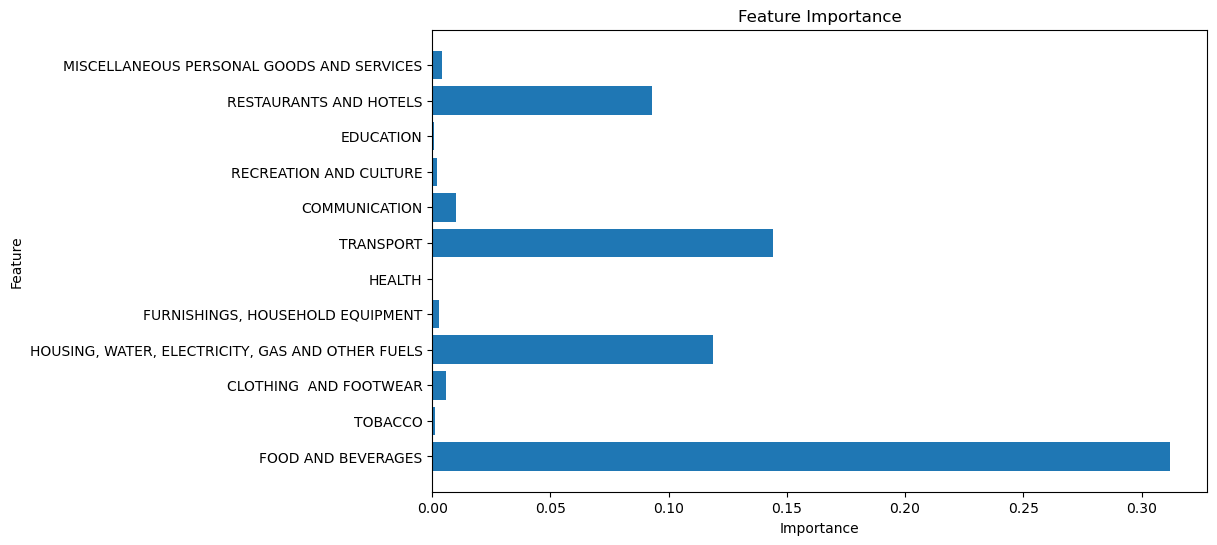

MSE: 0.0036072893302888176
MAE: 0.05041425229324372
RMSE: 0.06006071370112761
R-Squared: 0.9998663640562546


In [8]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('KSA_CPI_INDICES.xlsx')

# Exclude 'Year' and 'Month' variables
df = df.drop(['Year', 'Month'], axis=1)

# Define the target variable
target = 'GENERAL INDEX'

# Split the data into features (X) and target (y)
X = df.drop(target, axis=1)
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter tuning space
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [1e-3, 1e-2, 1e-1, 1, 10],
    'gamma': [1e-3, 1e-2, 1e-1, 1, 10]
}

# Perform grid search to optimize hyperparameters
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best-performing model
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate permutation feature importance
feature_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

# Print the feature importance
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance.importances_mean):
    print(f"{feature}: {importance}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance.importances_mean)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R-Squared: {r2}')

## Decision Tree Regression

Implementation below performs a regression analysis using a **Decision Tree Regressor** to predict the target variable **'GENERAL INDEX'** from Saudi Arabia CPI dataset. The process involves:

- **Data Preparation**: The dataset is loaded, with non-essential columns (Year and Month) removed. The remaining data is split into features (X) and the target variable (y).

- **Data Splitting**: The data is divided into training and testing sets to evaluate the model's performance later.

- **Hyperparameter Tuning**: A grid search with cross-validation (GridSearchCV) is conducted to find the optimal hyperparameters (e.g., max_depth, min_samples_split, min_samples_leaf) for the Decision Tree Regressor.

- **Model Training and Prediction**: The best-performing Decision Tree model is trained on the training data and used to make predictions on the testing set.

- **Model Evaluation**: The model's performance is assessed using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-Squared.

- **Feature Importance Analysis**: The importance of each feature in the model is calculated and visualized using a bar chart, highlighting which variables are most influential in predicting the target.

Feature Importance:
FOOD AND BEVERAGES: 4.1234852274640495e-05
TOBACCO: 0.00020216839860330918
CLOTHING  AND FOOTWEAR: 0.00019870748165742305
HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS: 0.0004842587404532734
FURNISHINGS, HOUSEHOLD EQUIPMENT: 0.8502164315791174
HEALTH: 0.00023355717896716903
TRANSPORT: 0.011420410421751489
COMMUNICATION: 0.027416089528609428
RECREATION AND CULTURE: 4.520814277280138e-05
EDUCATION: 8.26340679941047e-06
RESTAURANTS AND HOTELS: 0.10927630992881145
MISCELLANEOUS PERSONAL GOODS AND SERVICES: 0.00045736034018215715


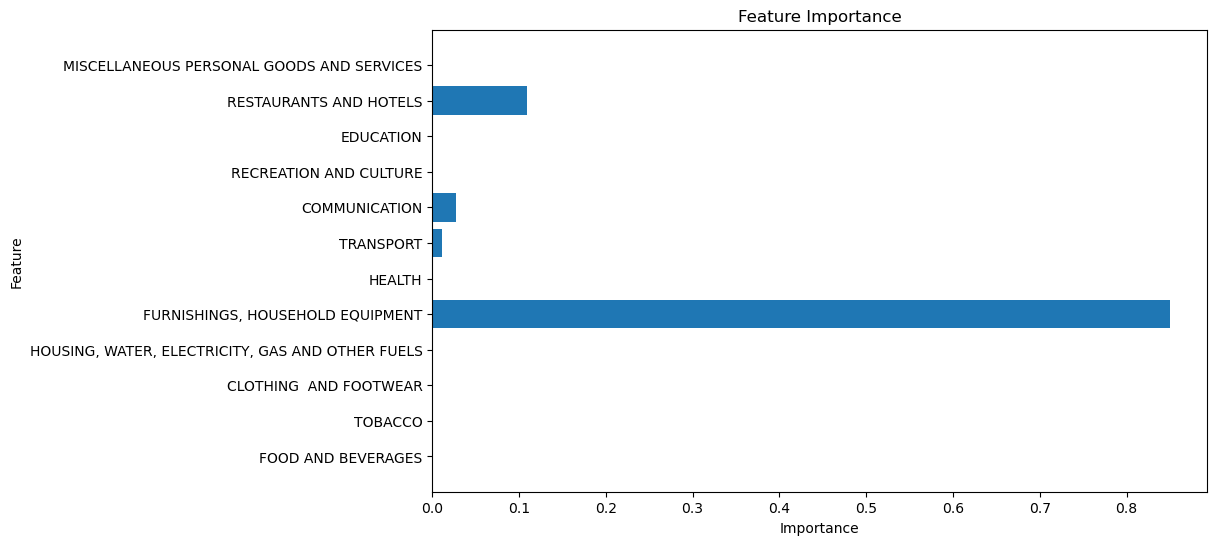

MSE: 0.45488597422805194
MAE: 0.3956228274347841
RMSE: 0.6744523513399979
R-Squared: 0.9831482559627065


In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('KSA_CPI_INDICES.xlsx')

# Exclude 'Year' and 'Month' variables
df = df.drop(['Year', 'Month'], axis=1)

# Define the target variable
target = 'GENERAL INDEX'

# Split the data into features (X) and target (y)
X = df.drop(target, axis=1)
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)


# Define the hyperparameter tuning space
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best-performing model
best_model = grid_search.best_estimator_


# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Get feature importance
feature_importance = model.feature_importances_

# Print feature importance
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R-Squared: {r2}')

## XGBoost Regression

*Before proceeding to the next model code execution, please ensure **xgboost** libarary is installed. If not installed already, please run the script below to install and verify the installation. You may need to restart the kernel to use updated packages*

In [12]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c4/41/f0980f72531ab8e1fdbeb2643c32f6bcc7e8777fa49e362f94d728887a58/xgboost-2.1.1-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:

import xgboost as xgb
print(xgb.__version__)
print ("Xgboost has been imported successfully.")

2.1.1
Xgboost has been imported successfully.


Implementation below performs an **XGBoost** regression to predict the target variable **'GENERAL INDEX'** using data from the Saudi Arabia CPI dataset. The process involves:

- **Data Preparation**: The dataset is loaded and cleaned by removing unnecessary columns (Year and Month). The remaining data is split into features (X) and the target variable (y).

- **Data Splitting**: The data is divided into training and testing sets to allow for model evaluation on unseen data.

- **Hyperparameter Tuning**: A grid search with cross-validation (GridSearchCV) is performed to identify the best combination of hyperparameters (e.g., max_depth, learning_rate, n_estimators, etc.) for the XGBoost model, optimizing it for the lowest mean squared error.

- **Model Training and Prediction**: The best model identified by the grid search is trained on the training data and used to make predictions on the testing set.

- **Model Evaluation**: The performance of the model is assessed using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-Squared.

- **Feature Importance Analysis**: The importance of each feature in making predictions is calculated and visualized using a bar chart, helping to understand which variables are most influential in predicting the target.

Feature Importance:
FOOD AND BEVERAGES: 0.7512162923812866
TOBACCO: 0.04261011630296707
CLOTHING  AND FOOTWEAR: 0.026888640597462654
HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS: 0.003368767211213708
FURNISHINGS, HOUSEHOLD EQUIPMENT: 0.0025552816223353148
HEALTH: 0.005200995597988367
TRANSPORT: 0.06654024869203568
COMMUNICATION: 0.030696837231516838
RECREATION AND CULTURE: 0.0035809676628559828
EDUCATION: 0.033459603786468506
RESTAURANTS AND HOTELS: 0.026041487231850624
MISCELLANEOUS PERSONAL GOODS AND SERVICES: 0.007840818725526333


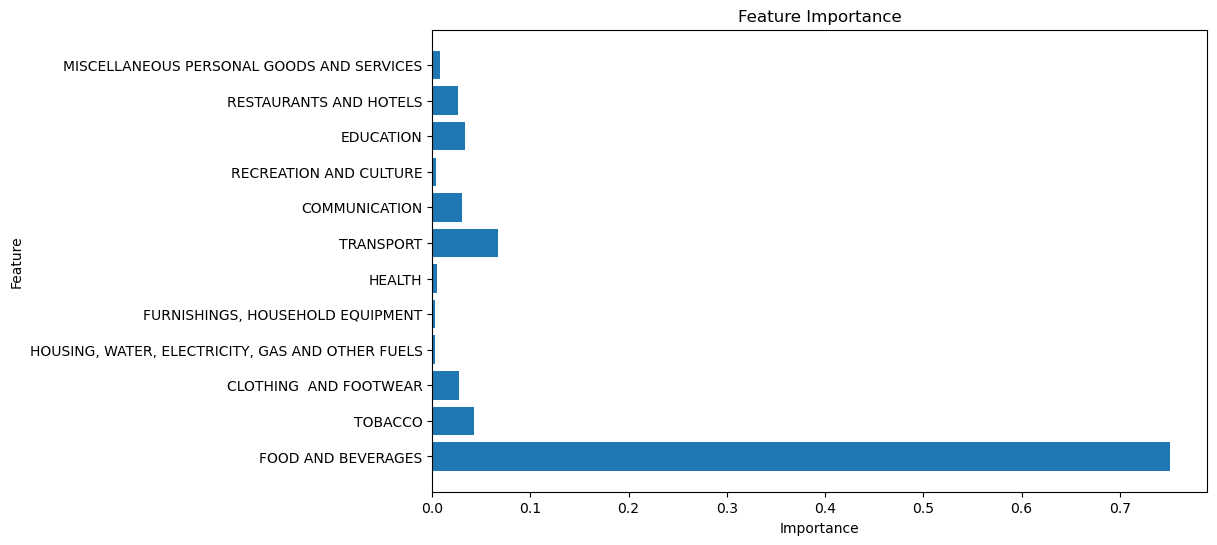

MSE: 0.1692793780887483
MAE: 0.2925829387090008
RMSE: 0.41143575207892213
R-Squared: 0.9937288619303226


In [2]:

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('KSA_CPI_INDICES.xlsx')

# Exclude 'Year' and 'Month' variables
df = df.drop(['Year', 'Month'], axis=1)

# Define the target variable
target = 'GENERAL INDEX'

# Split the data into features (X) and target (y)
X = df.drop(target, axis=1)
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter tuning space
param_grid = {
    'max_depth': [3, 5, 10],
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb.XGBRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best-performing model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Get feature importance
feature_importance = best_model.feature_importances_

# Print feature importance
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R-Squared: {r2}')

## Gradient Boost Regression

Implementation below uses a **Gradient Boosting Regressor** to predict the target variable **'GENERAL INDEX'** using the Saudi Arabia CPI dataset. The process involves:

- **Data Preparation**: The data is loaded, and unnecessary columns (Year and Month) are removed. The remaining data is split into features (X) and the target variable (y).

- **Data Splitting**: The dataset is divided into training and testing sets to allow for model training and evaluation.

- **Hyperparameter Tuning**: A grid search with cross-validation (GridSearchCV) is used to find the best hyperparameters for the Gradient Boosting Regressor (e.g., n_estimators, learning_rate, max_depth). This step aims to optimize the model's performance by minimizing the mean squared error.

- **Model Training and Prediction**: The best model identified by the grid search is trained on the training data and used to make predictions on the testing data.

- **Model Evaluation**: The model's performance is evaluated using metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-Squared.

- **Feature Importance Analysis**: The importance of each feature in predicting the target variable is calculated and visualized using a bar chart, highlighting which features are most influential.

MSE: 0.09921692040101095
MAE: 0.20990430230138757
RMSE: 0.31498717497861867
R-Squared: 0.996324401627015


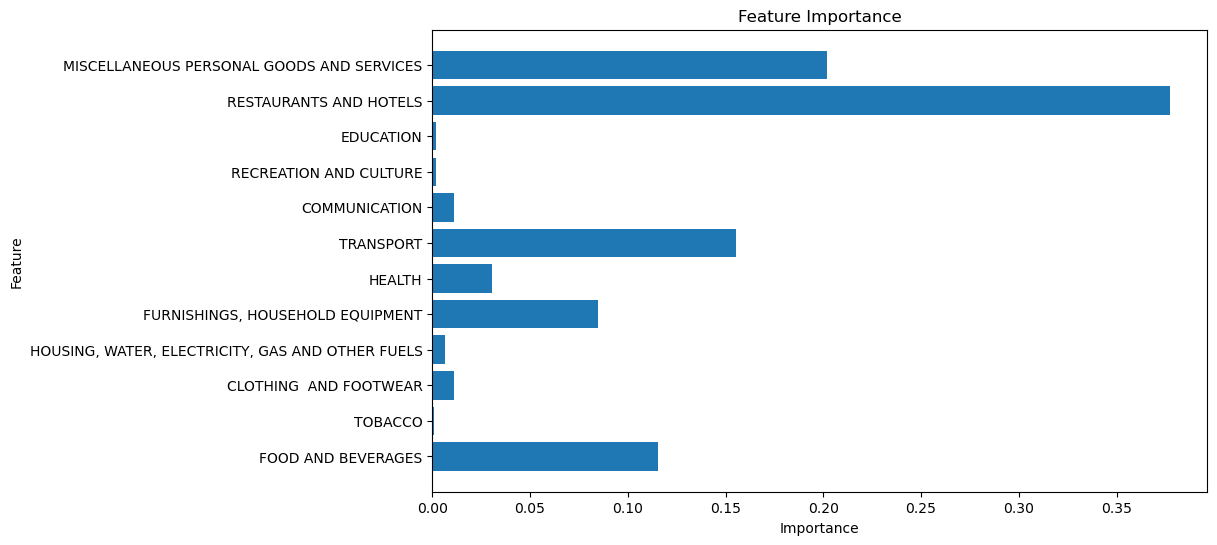

In [3]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('KSA_CPI_INDICES.xlsx')

# Exclude 'Year' and 'Month' variables
df = df.drop(['Year', 'Month'], axis=1)

# Define the target variable
target = 'GENERAL INDEX'

# Split the data into features (X) and target (y)
X = df.drop(target, axis=1)
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter tuning space
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best-performing model
best_model = grid_search.best_estimator_

# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R-Squared: {r2}')

# Get feature importance
feature_importance = best_model.feature_importances_


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## KNN Regression

Implementation below uses a **K-Nearest Neighbors (KNN) regression** model to predict the target variable **'GENERAL INDEX'** using the Saudi Arabia CPI dataset. The process involves:

- **Data Preparation**: The dataset is loaded and cleaned by removing non-essential columns (Year and Month). The data is then split into features (X) and the target variable (y).

- **Data Splitting and Standardization**: The data is divided into training and testing sets. The features are standardized (scaled) to ensure that all variables contribute equally to the model, which is important for distance-based algorithms like KNN.

- **Hyperparameter Tuning**: A grid search with cross-validation (GridSearchCV) is used to find the optimal hyperparameters for the KNN model (e.g., n_neighbors, weights, algorithm). This step aims to improve the model's performance by minimizing the mean squared error.

- **Model Training and Prediction**: The best KNN model identified by the grid search is trained on the scaled training data and then used to make predictions on the scaled testing data.

- **Model Evaluation**: The performance of the model is evaluated using metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-Squared to measure prediction accuracy.

- **Feature Importance Analysis**: Permutation importance is calculated to determine the impact of each feature on the model's predictions. The results are visualized using a bar chart to highlight the most important features.

MSE: 0.03007308216275362
MAE: 0.14876176272624675
RMSE: 0.1734159224602909
R-Squared: 0.998885910070366


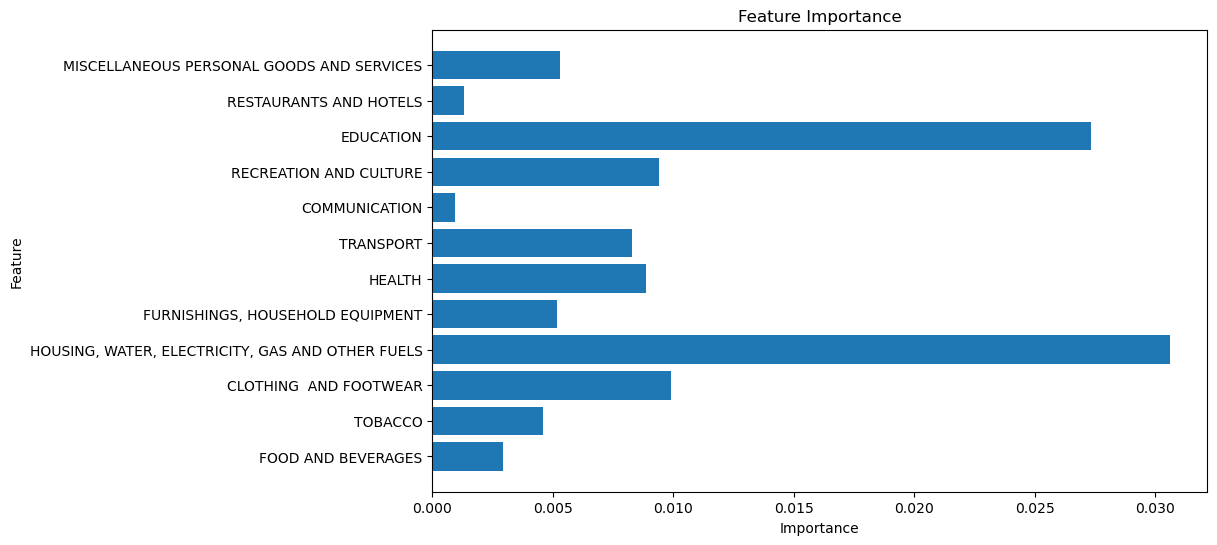

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('KSA_CPI_INDICES.xlsx')

# Exclude 'Year' and 'Month' variables
df = df.drop(['Year', 'Month'], axis=1)

# Define the target variable
target = 'GENERAL INDEX'

# Split the data into features (X) and target (y)
X = df.drop(target, axis=1)
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter tuning space
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best-performing model
best_model = grid_search.best_estimator_

# Train the best model on the entire training data
best_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R-Squared: {r2}')

# Calculate permutation feature importance
results = permutation_importance(best_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Get feature importance
feature_importance = results.importances_mean

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()